1.结构化数据和非结构化数据
结构化数据：数值型，一般为表格，行为样本，列为特征；
非结构化数据：一团数据，一般为文本或图片
2.定量数据和定性数据

下面结合代码具体演示

In [1]:
#定类等级：种类，可以计算众数
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('grayscale')
#房价预测数据
house_prices=pd.read_csv('E:\\ml\\数据集\\train_dataset.csv')

In [2]:
house_prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
#数据基本信息：样本个数，特征数，特征类型，
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    int64  
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    int64  
 9   TAX      455 non-null    int64  
 10  PIRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  PRICE    455 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 49.9 KB


In [4]:
#描述性统计，最大最小值，平均值等
house_prices.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#缺失值情况
house_prices.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PIRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
#初步选择所需要的特征
house_prices=house_prices[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PIRATIO','B','LSTAT','PRICE']]

In [7]:
house_prices.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

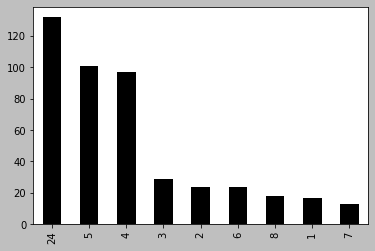

In [8]:
#定类数据'RAD'绘制柱状图
house_prices['RAD'].value_counts(ascending=False).plot(kind='bar')

<AxesSubplot:>

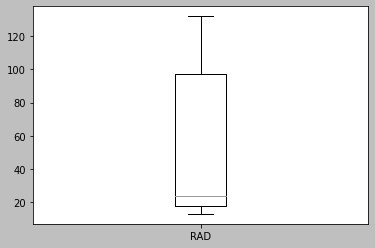

In [9]:
#定序等级：有排序、等级之分，可以比较，可以计算中位数，如评级

#仍以房价预测数据为例，对'RAD'特征绘制箱线图
house_prices['RAD'].value_counts(ascending=False).plot(kind='box')

<AxesSubplot:>

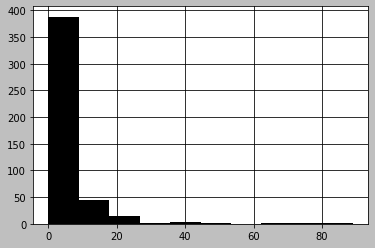

In [10]:
#定距等级：不仅可以比较，还可以进行加减，可以计算均值和方差

#选择'CRIM'特征绘制直方图，大致显示频率大小
house_prices['CRIM'].hist()

Text(0.5, 1.0, 'Top 20 high tax by mean')

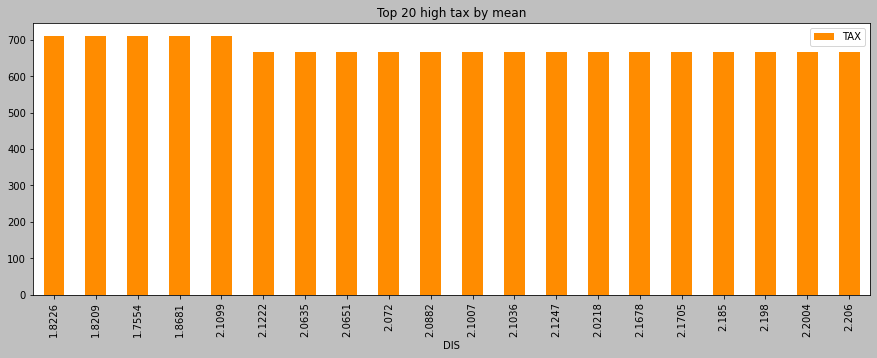

In [21]:
#定比等级：可以进行乘除运算，且以0点作为参照
fig=plt.figure(figsize=(15,5))
ax=fig.gca()#返回当前轴
#按照DIS特征对TAX进行分组并取出前20个税率最高的DIS
house_prices.groupby('DIS')[['TAX']].mean().sort_values('TAX',ascending=False).head(20).plot.bar(stacked=False,ax=ax,color='darkorange')
ax.set_title('Top 20 high tax by mean')

Text(0.5, 1.0, 'Bottom 20 high tax by mean')

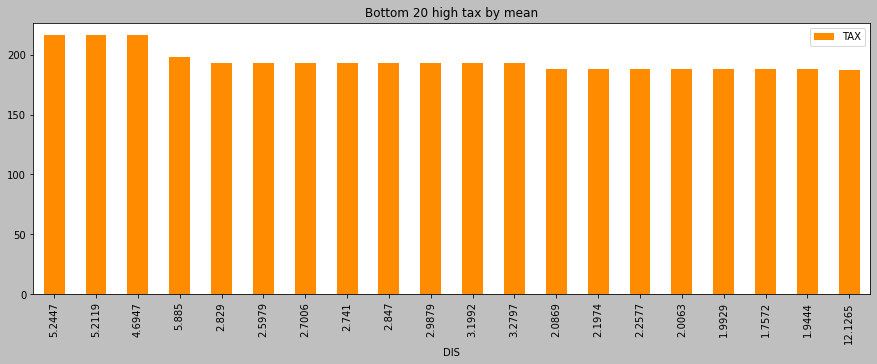

In [17]:
fig=plt.figure(figsize=(15,5))
ax=fig.gca()#返回当前轴
#按照DIS特征对TAX进行分组并取出最后20个税率最低的DIS
house_prices.groupby('DIS')[['TAX']].mean().sort_values('TAX',ascending=False).tail(20).plot.bar(stacked=False,ax=ax,color='darkorange')
ax.set_title('Bottom 20 high tax by mean')

In [19]:
#最高税率与最低税率的比值
rate=house_prices.groupby('DIS')[['TAX']].mean().sort_values('TAX',ascending=False)
rate.iloc[0][0]/rate.iloc[-1][0]

3.802139037433155

2.总结

| 等级 |         属性         |         例子         |  描述性统计  |      图表      |
| :--: | :------------------: | :------------------: | :----------: | :------------: |
| 定类 |      离散、无序      |    人名、油漆颜色    | 百分数、众数 |  柱状图、饼图  |
| 定序 |    有序类别、比较    | 李克特量表、考试等级 | 频率、中位数 |     茎叶图     |
| 定距 |    数字差别有意义    |         温度         | 均值、标准差 | 直方图、箱线图 |
| 定比 | 连续，零点，可以乘除 |         体重         | 均值、标准差 | 直方图、箱线图 |

|     统计量     | 定类 | 定序 | 定距 |   定比   |
| :------------: | :--: | :--: | :--: | :------: |
|      众数      |  √   |  √   |  √   | 有时可行 |
|     中位数     |  ×   |  √   |  √   |    √     |
| 最小值、最大值 |  ×   |  √   |  √   |    √     |
|      均值      |  ×   |  ×   |  √   |    √     |
|     标准差     |  ×   |  ×   |  √   |    √     |

拿到数据集时，基本的流程：<br />
（1）数据有没有结构，以表格存在有不同的行和列，还是以文本格式存在；<br />
（2）每列的数据是定性的还是定量的，单元格中的数据类型；<br />
（3）每列处于哪个等级，定类，定序，定距，定比；<br />
（4）使用什么图表可视化。


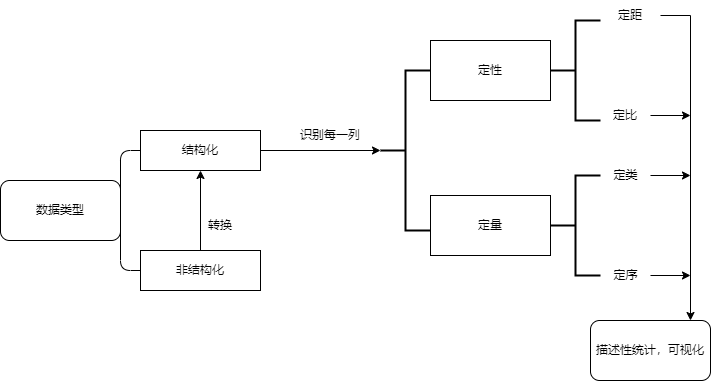